## Import Essential Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import Bank simulation dataset

In [ ]:
banksim = pd.read_csv('banksim.csv')
banksim.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


### Description of Dataset

> **Step**: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.  
> **Customer**: This feature represents the customer id  
> **zipCodeOrigin**: The zip code of origin/source.  
> **Merchant**: The merchant's id  
> **zipMerchant**: The merchant's zip code  
> **Age**: Categorized age:  
>0: <= 18,  
>1: 19-25,  
>2: 26-35,  
>3: 36-45,  
>4: 46:55,  
>5: 56:65,  
>6: > 65  
>U: Unknown  
> **Gender**: Gender for customer  
>E : Enterprise,  
>F: Female,  
>M: Male,  
>U: Unknown  
> **Category**: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.  
> **Amount**: Amount of the purchase  
> **Fraud**: Target variable which shows if the transaction fraudulent(1) or benign(0)  

---
Check size and type of dataset:

In [ ]:
print("Data type : ", type(banksim))
print("Data dims : ", banksim.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (594643, 10)


Check for missing values in the table:

In [ ]:
banksim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


As number of entries equal to the non-null count for every column, there are no missing values.

---

Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
print(banksim.dtypes)

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


Change age, gender and fraud to categorical variables and zipMerchant :

In [ ]:
banksim['age'] = banksim['age'].astype('category')
banksim['gender'] = banksim['gender'].astype('category')
banksim['category'] = banksim['category'].astype('category')
banksim['merchant'] = banksim['merchant'].astype('category')
banksim['customer'] = banksim['customer'].astype('category')
banksim['fraud'] = banksim['fraud'].astype('category')

print(banksim.dtypes)

step              int64
customer       category
age            category
gender         category
zipcodeOri       object
merchant       category
zipMerchant      object
category       category
amount          float64
fraud          category
dtype: object


## Data Exploration

Check the distribution of Fraud:

0    587443
1      7200
Name: fraud, dtype: int64


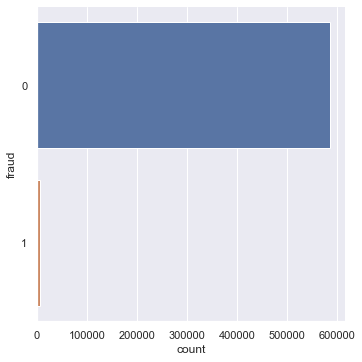

In [ ]:
print(banksim['fraud'].value_counts())

sb.catplot(y='fraud', data = banksim, kind = 'count')

To balance this distribution

1    7200
0    7200
Name: fraud, dtype: int64


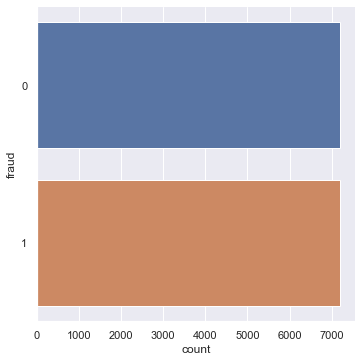

In [ ]:
nonfraudata = banksim[banksim['fraud'] == 0]
fraudata = banksim[banksim['fraud'] == 1]
samplenonfraud = nonfraudata.sample(n=7200, random_state = 369)
banksim2 = pd.concat([fraudata,samplenonfraud])

print(banksim2['fraud'].value_counts())

sb.catplot(y='fraud', data = banksim2, kind = 'count')

We realised zipcodeOri and zipMerchant only have one unique value hence we will drop them from our dataset

In [ ]:
print("Unique zipCodeOri values: ",banksim2.zipcodeOri.nunique())
print("Unique zipMerchant values: ",banksim2.zipMerchant.nunique())

banksim_reduced = banksim2.drop(['zipcodeOri','zipMerchant'],axis=1)
banksim_reduced.head(5)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


,step,customer,age,gender,merchant,category,amount,fraud
88,0,'C583110837','3','M','M480139044','es_health',44.26,1
89,0,'C1332295774','3','M','M480139044','es_health',324.50,1
434,0,'C1160421902','3','M','M857378720','es_hotelservices',176.32,1
435,0,'C966214713','3','M','M857378720','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','M1198415165','es_wellnessandbeauty',220.11,1


Export to CSV

In [ ]:
banksim_reduced.to_csv('banksimReduced.csv')

In [ ]:
print("Mean feature values per category",banksim2.groupby('category')['amount','fraud'].mean())

Mean feature values per category                               amount
category                            
'es_barsandrestaurants'   121.664118
'es_contents'              38.372500
'es_fashion'              168.818629
'es_food'                  36.798367
'es_health'               375.363005
'es_home'                 433.655000
'es_hotelservices'        414.273950
'es_hyper'                141.718839
'es_leisure'              300.286878
'es_otherservices'        301.649256
'es_sportsandtoys'        342.099401
'es_tech'                 369.097968
'es_transportation'        26.768260
'es_travel'              2660.802872
'es_wellnessandbeauty'    197.291975


<ipython-input-13-771a1b64f2b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print("Mean feature values per category",banksim2.groupby('category')['amount','fraud'].mean())


## Train-test Split

We will start by setting up our independent and dependent variables  

**Dependent Variable:** fraud  
**Independent Variable:** step, age, gender, zipcodeOri, merchant, zipMerchant, category, amount

Extract the variables from the dataset:

In [ ]:
# Extract Dependent and Independent variables
Y = pd.DataFrame(banksim_reduced['fraud'])
X = pd.DataFrame(banksim_reduced[['step','customer','age','gender','merchant','category','amount']])

In [ ]:
X = pd.get_dummies(banksim_reduced[['step','customer','age','gender','merchant','category','amount']],drop_first=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14400 entries, 88 to 303977
Columns: 4186 entries, step to category_'es_wellnessandbeauty'
dtypes: float64(1), int64(1), uint8(4184)
memory usage: 58.4 MB
None


In [ ]:
X.head()

,step,amount,customer_'C100045114',customer_'C1000699316',customer_'C1001065306',customer_'C1002658784',customer_'C1002759277',customer_'C1004109477',customer_'C1004300450',customer_'C1004532392',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
88,0,44.26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,324.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,0,176.32,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
435,0,337.41,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
553,0,220.11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
columns_names = list(X.columns)

Splitting the data:

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=2012)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (10080, 1) (10080, 4186)
Test Set  : (4320, 1) (4320, 4186)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 110643 to 394750
Columns: 4186 entries, step to category_'es_wellnessandbeauty'
dtypes: float64(1), int64(1), uint8(4184)
memory usage: 40.5 MB


## Random forest classifier

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 8, random_state = 42, verbose=1,class_weight="balanced")       

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

<ipython-input-12-40eb2d5a21aa>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.3s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=500,
                       random_state=42, verbose=1)

**Checking the accuracy of model**

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classification Accuracy 	: 0.9640873015873016

Goodness of Fit of Model 	Test Dataset


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Classification Accuracy 	: 0.9673611111111111



[Text(0.5, 12.5, 'Predicted'), Text(449.73636363636354, 0.5, 'Actual')]

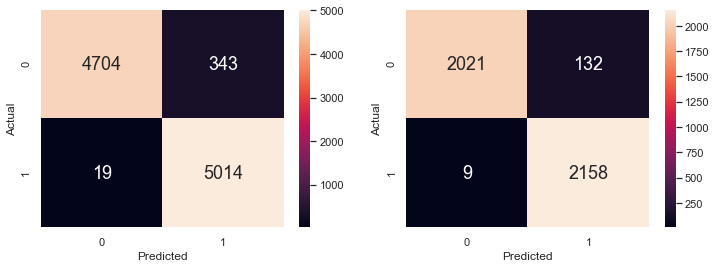

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data) 
print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print() 

# Plot the Confusion Matrix for Train and Test 
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
s1 = sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
s1.set(xlabel = 'Predicted', ylabel = 'Actual')
s2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
s2.set(xlabel = 'Predicted', ylabel = 'Actual')

Feature: amount, Score: 0.11124
Feature: merchant_'M1198415165', Score: 0.01332
Feature: merchant_'M1294758098', Score: 0.01183
Feature: merchant_'M1741626453', Score: 0.01123
Feature: merchant_'M1823072687', Score: 0.05501
Feature: merchant_'M1888755466', Score: 0.01090
Feature: merchant_'M2122776122', Score: 0.01004
Feature: merchant_'M348934600', Score: 0.07350
Feature: merchant_'M3697346', Score: 0.01284
Feature: merchant_'M480139044', Score: 0.05318
Feature: merchant_'M732195782', Score: 0.02506
Feature: merchant_'M85975013', Score: 0.01228
Feature: merchant_'M980657600', Score: 0.05797
Feature: category_'es_food', Score: 0.01222
Feature: category_'es_health', Score: 0.04543
Feature: category_'es_home', Score: 0.01092
Feature: category_'es_hotelservices', Score: 0.02369
Feature: category_'es_leisure', Score: 0.02589
Feature: category_'es_sportsandtoys', Score: 0.06125
Feature: category_'es_transportation', Score: 0.10947
Feature: category_'es_travel', Score: 0.02588
Feature: categ

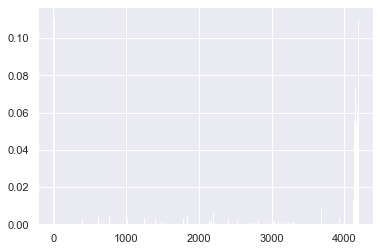

In [ ]:
importance = rforest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if(v > 0.01):
        print('Feature: %s, Score: %.5f' % (columns_names[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Checking False Negatives rate and False Positive rate

In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[2021  132]
 [   9 2158]]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Overall accuracy: ", round(ACC*100,2), '%')
print("False Negative rate: ", round(FNR*100,2), '%')
print("False Positive rate: ", round(FPR*100,2), '%' )

Overall accuracy:  96.74 %
False Negative rate:  0.42 %
False Positive rate:  6.13 %


## Reduced Random forest

In [ ]:
# Extract Dependent and Independent variables
Y = pd.DataFrame(banksim_reduced['fraud'])
X = pd.DataFrame(banksim_reduced[['merchant','category','amount']])

In [ ]:
X = pd.get_dummies(banksim_reduced[['merchant','category','amount']],drop_first=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14400 entries, 88 to 303977
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   amount                           14400 non-null  float64
 1   merchant_'M117188757'            14400 non-null  uint8  
 2   merchant_'M1198415165'           14400 non-null  uint8  
 3   merchant_'M1294758098'           14400 non-null  uint8  
 4   merchant_'M1313686961'           14400 non-null  uint8  
 5   merchant_'M1352454843'           14400 non-null  uint8  
 6   merchant_'M1353266412'           14400 non-null  uint8  
 7   merchant_'M1400236507'           14400 non-null  uint8  
 8   merchant_'M1416436880'           14400 non-null  uint8  
 9   merchant_'M151143676'            14400 non-null  uint8  
 10  merchant_'M1535107174'           14400 non-null  uint8  
 11  merchant_'M1600850729'           14400 non-null  uint8  
 12  merchant_'M16491

In [ ]:
X.head()

,amount,merchant_'M117188757',merchant_'M1198415165',merchant_'M1294758098',merchant_'M1313686961',merchant_'M1352454843',merchant_'M1353266412',merchant_'M1400236507',merchant_'M1416436880',merchant_'M151143676',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
88,44.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,324.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,176.32,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
435,337.41,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
553,220.11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Train test split

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=2012)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (10080, 1) (10080, 64)
Test Set  : (4320, 1) (4320, 64)


#### Random forest

In [ ]:
# Create the Random Forest object
rforest_reduced = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 8, random_state = 42, verbose=1,class_weight="balanced")       

# Fit Random Forest on Train Data
rforest_reduced.fit(X_train, y_train)

<ipython-input-30-d530a5774584>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_reduced.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.5s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=500,
                       random_state=42, verbose=1)

#### Checking accuracy of results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classification Accuracy 	: 0.9674603174603175

Goodness of Fit of Model 	Test Dataset


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Classification Accuracy 	: 0.9689814814814814



[Text(0.5, 12.5, 'Predicted'), Text(449.73636363636354, 0.5, 'Actual')]

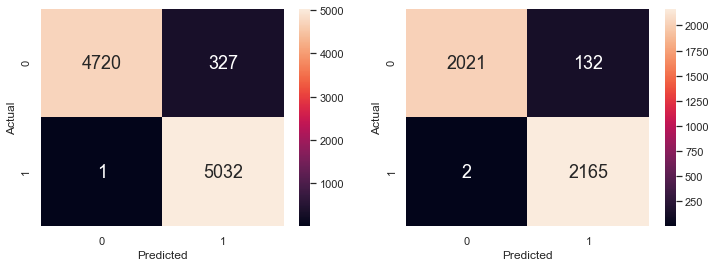

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = rforest_reduced.predict(X_train)
y_test_pred = rforest_reduced.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest_reduced.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data) 
print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy \t:", rforest_reduced.score(X_test, y_test))
print() 

# Plot the Confusion Matrix for Train and Test 
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
s1 = sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
s1.set(xlabel = 'Predicted', ylabel = 'Actual')
s2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
s2.set(xlabel = 'Predicted', ylabel = 'Actual')

Checking False Negatives rate and False Positive rate

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Overall accuracy: ", round(ACC*100,2), '%')
print("False Negative rate: ", round(FNR*100,2), '%')
print("False Positive rate: ", round(FPR*100,2), '%' )

Overall accuracy:  96.9 %
False Negative rate:  0.09 %
False Positive rate:  6.13 %


## Using catergorized data 

In [ ]:
categorized_data = pd.read_csv('categorized_merchant_customer_fraud01.csv')
categorized_data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,low_freq_customer,3,M,very_high_freq_merchant,es_health,44.26,1
1,0,low_freq_customer,3,M,very_high_freq_merchant,es_health,324.50,1
2,0,low_freq_customer,3,M,low_freq_merchant,es_hotelservices,176.32,1
3,0,low_freq_customer,3,M,low_freq_merchant,es_hotelservices,337.41,1
4,0,low_freq_customer,4,F,medium_freq_merchant,es_wellnessandbeauty,220.11,1


In [ ]:
categorized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      14400 non-null  int64  
 1   customer  14400 non-null  object 
 2   age       14400 non-null  object 
 3   gender    14400 non-null  object 
 4   merchant  14400 non-null  object 
 5   category  14400 non-null  object 
 6   amount    14400 non-null  float64
 7   fraud     14400 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 900.1+ KB


In [ ]:
categorized_data['age'] = categorized_data['age'].astype('category')
categorized_data['gender'] = categorized_data['gender'].astype('category')
categorized_data['category'] = categorized_data['category'].astype('category')
categorized_data['merchant'] = categorized_data['merchant'].astype('category')
categorized_data['customer'] = categorized_data['customer'].astype('category')
categorized_data['fraud'] = categorized_data['fraud'].astype('category')

print(categorized_data.dtypes)

step           int64
customer    category
age         category
gender      category
merchant    category
category    category
amount       float64
fraud       category
dtype: object


splitting X and Y and encode Y to variables

In [ ]:
# Import precrocessing from sklearn
from sklearn import preprocessing
y_categories = {'fraud_category':{'not_fraud': 0, 'fraud':1, 'major_fraud':2}}
Y = pd.DataFrame(categorized_data['fraud_category']).replace(y_categories)
X = pd.DataFrame(categorized_data[['step','customer','age','gender','merchant','category','amount']])
#le = preprocessing.LabelEncoder()

#Y = pd.DataFrame({'fraud_category':le.transform(Y)})
X = pd.get_dummies(categorized_data[['step','customer','age','gender','merchant','category','amount']],drop_first=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   step                              14400 non-null  int64  
 1   amount                            14400 non-null  float64
 2   customer_low_freq_customer        14400 non-null  uint8  
 3   customer_medium_freq_customer     14400 non-null  uint8  
 4   age_1                             14400 non-null  uint8  
 5   age_2                             14400 non-null  uint8  
 6   age_3                             14400 non-null  uint8  
 7   age_4                             14400 non-null  uint8  
 8   age_5                             14400 non-null  uint8  
 9   age_6                             14400 non-null  uint8  
 10  age_U                             14400 non-null  uint8  
 11  gender_F                          14400 non-null  uint8  
 12  gend

### Train-test split

In [ ]:
Y = pd.DataFrame(categorized_data['fraud'])
X = pd.DataFrame(categorized_data[['step','customer','age','gender','merchant','category','amount']])

X = pd.get_dummies(categorized_data[['step','customer','age','gender','merchant','category','amount']],drop_first=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   step                              14400 non-null  int64  
 1   amount                            14400 non-null  float64
 2   customer_low_freq_customer        14400 non-null  uint8  
 3   customer_medium_freq_customer     14400 non-null  uint8  
 4   age_1                             14400 non-null  uint8  
 5   age_2                             14400 non-null  uint8  
 6   age_3                             14400 non-null  uint8  
 7   age_4                             14400 non-null  uint8  
 8   age_5                             14400 non-null  uint8  
 9   age_6                             14400 non-null  uint8  
 10  age_U                             14400 non-null  uint8  
 11  gender_F                          14400 non-null  uint8  
 12  gend

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=2012)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (10080, 1) (10080, 31)
Test Set  : (4320, 1) (4320, 31)


Showing the columns of Y

In [ ]:
y_train.head()

,fraud
1609,1
4243,1
11595,0
14354,0
12926,0


Y columns in numbers: 
> **fraud** = 0   
> **major_fraud** = 1   
> **non-fraud** = 2   

In [ ]:
print(Y['fraud'].value_counts())

1    7200
0    7200
Name: fraud, dtype: int64


### Random forest

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest object
rforest_reduced = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 8, random_state = 42, verbose=1,class_weight="balanced")       

# Fit Random Forest on Train Data
rforest_reduced.fit(X_train, y_train)

<ipython-input-14-2836bf133489>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_reduced.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=500,
                       random_state=42, verbose=1)

Checking accuracy of results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classification Accuracy 	: 0.9735119047619047

Goodness of Fit of Model 	Test Dataset


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Classification Accuracy 	: 0.9731481481481481



[Text(0.5, 12.5, 'Predicted'), Text(449.73636363636354, 0.5, 'Actual')]

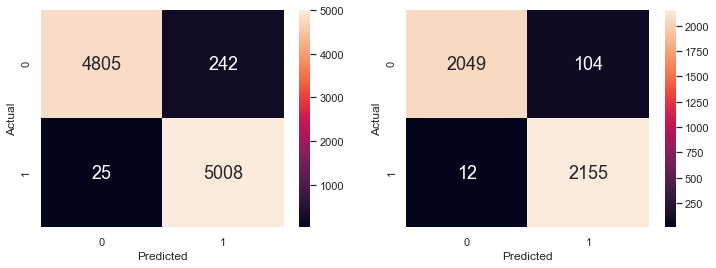

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
# Predict Legendary values corresponding to Total
y_train_pred = rforest_reduced.predict(X_train)
y_test_pred = rforest_reduced.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest_reduced.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data) 
print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy \t:", rforest_reduced.score(X_test, y_test))
print() 

# Plot the Confusion Matrix for Train and Test 
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
s1 = sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
s1.set(xlabel = 'Predicted', ylabel = 'Actual')
s2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
s2.set(xlabel = 'Predicted', ylabel = 'Actual')

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Overall accuracy: ", round(ACC*100,2), '%')
print("False Negative rate: ", round(FNR*100,2), '%')
print("False Positive rate: ", round(FPR*100,2), '%' )

Overall accuracy:  97.31 %
False Negative rate:  0.55 %
False Positive rate:  4.83 %
